## Part 1: Utilização do one-hot-encoding (OHE) para transformar atributos categóricos em numéricos

### (1a) One-hot-encoding

In [73]:
# Data for manual OHE
# Note: the first data point does not include any value for the optional third feature
sampleOne = [(0, 'mouse'), (1, 'black')]
sampleTwo = [(0, 'cat'), (1, 'tabby'), (2, 'mouse')]
sampleThree =  [(0, 'bear'), (1, 'black'), (2, 'salmon')]
sampleDataRDD = sc.parallelize([sampleOne, sampleTwo, sampleThree])

In [74]:
# EXERCICIO
sampleOHEDictManual = {}
sampleOHEDictManual[(0,'bear')] = 0
sampleOHEDictManual[(0,'cat')] = 1
sampleOHEDictManual[(0,'mouse')] = 2
sampleOHEDictManual[(1, 'black')] = 3
sampleOHEDictManual[(1, 'tabby')] = 4
sampleOHEDictManual[(2, 'mouse')] = 5
sampleOHEDictManual[(2, 'salmon')] = 6

In [75]:
# TEST One-hot-encoding (1a)
assert (0, 'mouse') in sampleOHEDictManual, "(0, 'mouse') not in sampleOHEDictManual"
assert (0, 'cat') in sampleOHEDictManual, "(0, 'cat') not in sampleOHEDictManual"
assert (0, 'bear') in sampleOHEDictManual, "(0, 'bear') not in sampleOHEDictManual"
assert (1, 'black') in sampleOHEDictManual, "(1, 'black') not in sampleOHEDictManual"
assert (1, 'tabby') in sampleOHEDictManual, "(1, 'tabby') not in sampleOHEDictManual"
assert (2, 'mouse') in sampleOHEDictManual, "(2, 'mouse') not in sampleOHEDictManual"
assert (2, 'salmon') in sampleOHEDictManual, "(2, 'salmon') not in sampleOHEDictManual"

### (1b) Vetores Esparsos

In [76]:
import numpy as np
from pyspark.mllib.linalg import SparseVector

In [77]:
# EXERCICIO
aDense = np.array([0., 3., 0., 4.])
aSparse = SparseVector(4,[(1,3),(3,4)])

bDense = np.array([0., 0., 0., 1.])
bSparse = SparseVector(4,[(3,1)])

w = np.array([0.4, 3.1, -1.4, -.5])
print (aDense.dot(w))
print (aSparse.dot(w))
print (bDense.dot(w))
print (bSparse.dot(w))

7.3
7.3
-0.5
-0.5


In [78]:
# TEST Sparse Vectors (1b)
assert isinstance(aSparse, SparseVector), 'aSparse needs to be an instance of SparseVector'
assert isinstance(bSparse, SparseVector), 'aSparse needs to be an instance of SparseVector'
assert aDense.dot(w) == aSparse.dot(w), 'dot product of aDense and w should equal dot product of aSparse and w'
assert bDense.dot(w) == bSparse.dot(w), 'dot product of bDense and w should equal dot product of bSparse and w'

### (1c) Atributos OHE como vetores esparsos

In [79]:
# Reminder of the sample features
# sampleOne = [(0, 'mouse'), (1, 'black')]
# sampleTwo = [(0, 'cat'), (1, 'tabby'), (2, 'mouse')]
# sampleThree =  [(0, 'bear'), (1, 'black'), (2, 'salmon')]

In [80]:
# EXERCICIO
sampleOneOHEFeatManual = SparseVector(7, [(2,1), (3,1)])
sampleTwoOHEFeatManual = SparseVector(7, [(1,1),(4,1),(5,1)])
sampleThreeOHEFeatManual = SparseVector(7,[(0,1),(3,1),(6,1)])

In [81]:
# TEST OHE Features as sparse vectors (1c)# TEST  
assert isinstance(sampleOneOHEFeatManual, SparseVector), 'sampleOneOHEFeatManual needs to be a SparseVector'
assert isinstance(sampleTwoOHEFeatManual, SparseVector), 'sampleTwoOHEFeatManual needs to be a SparseVector'
assert isinstance(sampleThreeOHEFeatManual, SparseVector), 'sampleThreeOHEFeatManual needs to be a SparseVector'

### (1d) Função de codificação OHE 

In [82]:
# EXERCICIO
def oneHotEncoding(rawFeats, OHEDict, numOHEFeats):
    """Produce a one-hot-encoding from a list of features and an OHE dictionary.

    Note:
        You should ensure that the indices used to create a SparseVector are sorted.

    Args:
        rawFeats (list of (int, str)): The features corresponding to a single observation.  Each
            feature consists of a tuple of featureID and the feature's value. (e.g. sampleOne)
        OHEDict (dict): A mapping of (featureID, value) to unique integer.
        numOHEFeats (int): The total number of unique OHE features (combinations of featureID and
            value).

    Returns:
        SparseVector: A SparseVector of length numOHEFeats with indicies equal to the unique
            identifiers for the (featureID, value) combinations that occur in the observation and
            with values equal to 1.0.
    """
    return SparseVector(numOHEFeats, [(OHEDict[(featID, value)],1) for (featID, value) in rawFeats])


# Calculate the number of features in sampleOHEDictManual
numSampleOHEFeats = len(sampleOHEDictManual)

# Run oneHotEnoding on sampleOne
sampleOneOHEFeat = oneHotEncoding(sampleOne, sampleOHEDictManual, numSampleOHEFeats)

print (sampleOneOHEFeat)

(7,[2,3],[1.0,1.0])


In [83]:
print (sampleOneOHEFeatManual)

(7,[2,3],[1.0,1.0])


In [84]:
# TEST Define an OHE Function (1d)
assert sampleOneOHEFeat == sampleOneOHEFeatManual, 'sampleOneOHEFeat should equal sampleOneOHEFeatManual'

### (1e) Aplicar OHE em uma base de dados

In [85]:
# EXERCICIO
sampleOHEData = sampleDataRDD.map(lambda r: oneHotEncoding(r, sampleOHEDictManual, numSampleOHEFeats))
print (sampleOHEData.collect())

[SparseVector(7, {2: 1.0, 3: 1.0}), SparseVector(7, {1: 1.0, 4: 1.0, 5: 1.0}), SparseVector(7, {0: 1.0, 3: 1.0, 6: 1.0})]


In [86]:
# TEST Apply OHE to a dataset (1e)# TEST  
sampleOHEDataValues = sampleOHEData.collect()
assert len(sampleOHEDataValues) == 3, 'sampleOHEData should have three elements'

## Part 2: Construindo um dicionário OHE

### (2a) Tupla RDD de (IDatributo, categoria)

In [87]:
# EXERCICIO
sampleDistinctFeats = (sampleDataRDD.flatMap(lambda r: r).distinct())

In [88]:
# TEST Pair RDD of (featureID, category) (2a)
assert sorted(sampleDistinctFeats.collect()) == [(0, 'bear'), (0, 'cat'), (0, 'mouse'), (1, 'black'),(1, 'tabby'), (2, 'mouse'), (2, 'salmon')], 'incorrect value for sampleDistinctFeats'

### (2b) Dicionário OHE de atributos únicos

In [89]:
# EXERCICIO
sampleOHEDict = (sampleDistinctFeats.zipWithIndex().collectAsMap())
print (sampleOHEDict)

{(1, 'black'): 0, (1, 'tabby'): 1, (2, 'mouse'): 2, (0, 'bear'): 3, (0, 'mouse'): 4, (0, 'cat'): 5, (2, 'salmon'): 6}


In [90]:
# TEST OHE Dictionary from distinct features (2b)
assert sorted(sampleOHEDict.keys()) == [(0, 'bear'), (0, 'cat'), (0, 'mouse'), (1, 'black'),(1, 'tabby'), (2, 'mouse'), (2, 'salmon')], 'sampleOHEDict has unexpected keys'
assert sorted(sampleOHEDict.values()) == list(range(7)), 'sampleOHEDict has unexpected values'

### (2c) Criação automática do dicionário OHE

In [91]:
# EXERCICIO
def createOneHotDict(inputData):
    """Creates a one-hot-encoder dictionary based on the input data.

    Args:
        inputData (RDD of lists of (int, str)): An RDD of observations where each observation is
            made up of a list of (featureID, value) tuples.

    Returns:
        dict: A dictionary where the keys are (featureID, value) tuples and map to values that are
            unique integers.
    """
    return (inputData.flatMap(lambda r: r).distinct().zipWithIndex().collectAsMap())

sampleOHEDictAuto = createOneHotDict(sampleDataRDD)
print (sampleOHEDictAuto)

{(1, 'black'): 0, (1, 'tabby'): 1, (2, 'mouse'): 2, (0, 'bear'): 3, (0, 'mouse'): 4, (0, 'cat'): 5, (2, 'salmon'): 6}


In [92]:
# TEST Automated creation of an OHE dictionary (2c)
assert sorted(sampleOHEDictAuto.keys()) == [(0, 'bear'), (0, 'cat'), (0, 'mouse'), (1, 'black'), (1, 'tabby'), (2, 'mouse'), (2, 'salmon')], 'sampleOHEDictAuto has unexpected keys'
assert sorted(sampleOHEDictAuto.values()) == list(range(7)), 'sampleOHEDictAuto has unexpected values'

## Part 3: Parse CTR data and generate OHE features

In [93]:
import os.path
fileName = os.path.join('dac_sample.txt')

if os.path.isfile(fileName):
    rawData = (sc
               .textFile(fileName, 2)
               .map(lambda x: x.replace('\t', ',')))  # work with either ',' or '\t' separated data
    print (rawData.take(1))

['0,1,1,5,0,1382,4,15,2,181,1,2,,2,68fd1e64,80e26c9b,fb936136,7b4723c4,25c83c98,7e0ccccf,de7995b8,1f89b562,a73ee510,a8cd5504,b2cb9c98,37c9c164,2824a5f6,1adce6ef,8ba8b39a,891b62e7,e5ba7672,f54016b9,21ddcdc9,b1252a9d,07b5194c,,3a171ecb,c5c50484,e8b83407,9727dd16']


### (3a) Carregando e dividindo os dados

In [94]:
# EXERCICIO
weights = [.8, .1, .1]
seed = 42
# Use randomSplit with weights and seed
rawTrainData, rawValidationData, rawTestData = rawData.randomSplit(weights, seed)
# Cache the data
rawTrainData.cache()
rawValidationData.cache()
rawTestData.cache()

nTrain = rawTrainData.count()
nVal = rawValidationData.count()
nTest = rawTestData.count()
print (nTrain, nVal, nTest, nTrain + nVal + nTest)
print (rawData.take(1))

80053 9941 10006 100000
['0,1,1,5,0,1382,4,15,2,181,1,2,,2,68fd1e64,80e26c9b,fb936136,7b4723c4,25c83c98,7e0ccccf,de7995b8,1f89b562,a73ee510,a8cd5504,b2cb9c98,37c9c164,2824a5f6,1adce6ef,8ba8b39a,891b62e7,e5ba7672,f54016b9,21ddcdc9,b1252a9d,07b5194c,,3a171ecb,c5c50484,e8b83407,9727dd16']


In [95]:
# TEST Loading and splitting the data (3a)
assert all([rawTrainData.is_cached, rawValidationData.is_cached, rawTestData.is_cached]), 'you must cache the split data'
assert nTrain == 80053, 'incorrect value for nTrain'
assert nVal == 9941, 'incorrect value for nVal'
assert nTest == 10006, 'incorrect value for nTest'

### (3b) Extração de atributos

In [96]:
# EXERCICIO
def parsePoint(point):
    """Converts a comma separated string into a list of (featureID, value) tuples.

    Note:
        featureIDs should start at 0 and increase to the number of features - 1.

    Args:
        point (str): A comma separated string where the first value is the label and the rest
            are features.

    Returns:
        list: A list of (featureID, value) tuples.
    """
    return [(featureID, value) for (featureID, value) in enumerate(point.split(',')[1:])]

parsedTrainFeat = rawTrainData.map(parsePoint)

numCategories = (parsedTrainFeat
                 .flatMap(lambda x: x)
                 .distinct()
                 .map(lambda x: (x[0], 1))
                 .reduceByKey(lambda x, y: x + y)
                 .sortByKey()
                 .collect()
                )

print (numCategories[2][1])

864


In [97]:
# TEST Extract features (3b)
assert numCategories[2][1] == 864, 'incorrect implementation of parsePoint'
assert numCategories[32][1] == 4, 'incorrect implementation of parsePoint'

### (3c) Crie o dicionário de OHE dessa base de dados

In [98]:
# EXERCICIO
ctrOHEDict = createOneHotDict(parsedTrainFeat)
numCtrOHEFeats = len(ctrOHEDict.keys())
print (numCtrOHEFeats)
print (ctrOHEDict[(0, '')])

234358
50


In [99]:
# TEST Create an OHE dictionary from the dataset (3c)
assert numCtrOHEFeats == 234358, 'incorrect number of features in ctrOHEDict'
assert (0, '') in ctrOHEDict, 'incorrect features in ctrOHEDict'

### (3d) Aplicando OHE à base de dados

In [100]:
from pyspark.mllib.regression import LabeledPoint

In [101]:
# EXERCICIO
def parseOHEPoint(point, OHEDict, numOHEFeats):
    """Obtain the label and feature vector for this raw observation.

    Note:
        You must use the function `oneHotEncoding` in this implementation or later portions
        of this lab may not function as expected.

    Args:
        point (str): A comma separated string where the first value is the label and the rest
            are features.
        OHEDict (dict of (int, str) to int): Mapping of (featureID, value) to unique integer.
        numOHEFeats (int): The number of unique features in the training dataset.

    Returns:
        LabeledPoint: Contains the label for the observation and the one-hot-encoding of the
            raw features based on the provided OHE dictionary.
    """
    return LabeledPoint(point.split(',')[0],oneHotEncoding(parsePoint(point), OHEDict, numCtrOHEFeats))

OHETrainData = rawTrainData.map(lambda point: parseOHEPoint(point, ctrOHEDict, numCtrOHEFeats))
OHETrainData.cache()
print (OHETrainData.take(1))

# Check that oneHotEncoding function was used in parseOHEPoint
backupOneHot = oneHotEncoding
oneHotEncoding = None
withOneHot = False
try: parseOHEPoint(rawTrainData.take(1)[0], ctrOHEDict, numCtrOHEFeats)
except TypeError: withOneHot = True
oneHotEncoding = backupOneHot

[LabeledPoint(0.0, (234358,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,117215,117216,117217,117218,117219,117220,117221,117222,117223,117224,117225,117226,117227,117228,117229,117230,117231,117232,117233,117234,117235],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]))]


In [102]:
# TEST Apply OHE to the dataset (3d)
numNZ = sum(parsedTrainFeat.map(lambda x: len(x)).take(5))
numNZAlt = sum(OHETrainData.map(lambda lp: len(lp.features.indices)).take(5))
assert numNZ == numNZAlt, 'incorrect implementation of parseOHEPoint'
assert withOneHot, 'oneHotEncoding not present in parseOHEPoint'

### Visualização 1: Frequência dos Atributos

In [103]:
def bucketFeatByCount(featCount):
    """Bucket the counts by powers of two."""
    for i in range(11):
        size = 2 ** i
        if featCount <= size:
            return size
    return -1

featCounts = (OHETrainData
              .flatMap(lambda lp: lp.features.indices)
              .map(lambda x: (x, 1))
              .reduceByKey(lambda x, y: x + y))
featCountsBuckets = (featCounts
                     .map(lambda x: (bucketFeatByCount(x[1]), 1))
                     .filter(lambda kv: kv[0] != -1)
                     .reduceByKey(lambda x, y: x + y)
                     .collect())
print (featCountsBuckets)

[(8, 11480), (2, 23578), (16, 7750), (128, 1504), (64, 2663), (256, 733), (32, 4792), (512, 416), (1024, 251), (4, 16870), (1, 164030)]


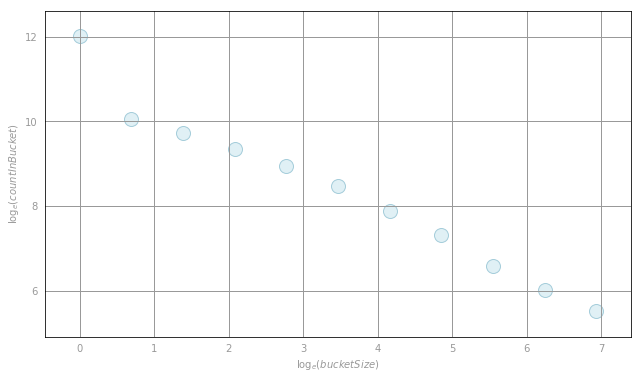

In [104]:
import matplotlib.pyplot as plt
% matplotlib inline

x, y = zip(*featCountsBuckets)
x, y = np.log(x), np.log(y)

def preparePlot(xticks, yticks, figsize=(10.5, 6), hideLabels=False, gridColor='#999999',
                gridWidth=1.0):
    """Template for generating the plot layout."""
    plt.close()
    fig, ax = plt.subplots(figsize=figsize, facecolor='white', edgecolor='white')
    ax.axes.tick_params(labelcolor='#999999', labelsize='10')
    for axis, ticks in [(ax.get_xaxis(), xticks), (ax.get_yaxis(), yticks)]:
        axis.set_ticks_position('none')
        axis.set_ticks(ticks)
        axis.label.set_color('#999999')
        if hideLabels: axis.set_ticklabels([])
    plt.grid(color=gridColor, linewidth=gridWidth, linestyle='-')
    map(lambda position: ax.spines[position].set_visible(False), ['bottom', 'top', 'left', 'right'])
    return fig, ax

# generate layout and plot data
fig, ax = preparePlot(np.arange(0, 10, 1), np.arange(4, 14, 2))
ax.set_xlabel(r'$\log_e(bucketSize)$'), ax.set_ylabel(r'$\log_e(countInBucket)$')
plt.scatter(x, y, s=14**2, c='#d6ebf2', edgecolors='#8cbfd0', alpha=0.75)
pass

### (3e) Atributos não observados

In [105]:
# EXERCICIO=
def oneHotEncoding(rawFeats, OHEDict, numOHEFeats):
    """Produce a one-hot-encoding from a list of features and an OHE dictionary.

    Note:
        If a (featureID, value) tuple doesn't have a corresponding key in OHEDict it should be
        ignored.

    Args:
        rawFeats (list of (int, str)): The features corresponding to a single observation.  Each
            feature consists of a tuple of featureID and the feature's value. (e.g. sampleOne)
        OHEDict (dict): A mapping of (featureID, value) to unique integer.
        numOHEFeats (int): The total number of unique OHE features (combinations of featureID and
            value).

    Returns:
        SparseVector: A SparseVector of length numOHEFeats with indicies equal to the unique
            identifiers for the (featureID, value) combinations that occur in the observation and
            with values equal to 1.0.
    """
    validFeatureTuples = []
    for (featID, value) in rawFeats:
        try:
            validFeatureTuples.append((OHEDict[(featID, value)],1))
        except KeyError:
            pass
    return SparseVector(numOHEFeats, validFeatureTuples)

OHEValidationData = rawValidationData.map(lambda point: parseOHEPoint(point, ctrOHEDict, numCtrOHEFeats))
OHEValidationData.cache()
print (OHEValidationData.take(1))

[LabeledPoint(0.0, (234358,[2,8,15,21,45,49,50,52,61,96,135,160,164,671,1355,5140,5141,5142,117223,117226,117238,117242,117258,117261,117262,117267,117269,117284,117287,118378,119236,120375,122236,122237,122238,122239,122240,122241,170030],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]))]


In [106]:
# TEST Handling unseen features (3e)
numNZVal = (OHEValidationData
            .map(lambda lp: len(lp.features.indices))
            .sum())
assert numNZVal == 367585, 'incorrect number of features'

## Part 4: Predição do CTR e avaliação da perda-log (logloss)

### (4a) Regressão Logística

In [107]:
from pyspark.mllib.classification import LogisticRegressionWithSGD

# fixed hyperparameters
numIters = 50
stepSize = 10.
regParam = 1e-6
regType = 'l2'
includeIntercept = True

In [108]:
# EXERCICIO
model0 = LogisticRegressionWithSGD.train(OHETrainData,iterations=numIters,step=stepSize,regParam=regParam,
                                  regType=regType,intercept=includeIntercept)
sortedWeights = sorted(model0.weights)
print (sortedWeights[:5], model0.intercept)

[-0.46297159426279577, -0.39040230182817892, -0.3871281985827924, -0.35815003494268316, -0.34963241495474701] 0.5616041364601837


In [109]:
# TEST Logistic regression (4a)
assert np.allclose(model0.intercept,  0.5616041364601837), 'incorrect value for model0.intercept'
assert np.allclose(sortedWeights[0:5], [-0.46297159426279577, -0.39040230182817892, -0.3871281985827924, -0.35815003494268316, -0.34963241495474701]), 'incorrect value for model0.weights'

### (4b) Log loss

In [110]:
# EXERCICIO
import numpy as np

def computeLogLoss(p, y):
    """Calculates the value of log loss for a given probabilty and label.

    Note:
        log(0) is undefined, so when p is 0 we need to add a small value (epsilon) to it
        and when p is 1 we need to subtract a small value (epsilon = 1e-11) from it.

    Args:
        p (float): A probabilty between 0 and 1.
        y (int): A label.  Takes on the values 0 and 1.

    Returns:
        float: The log loss value.
    """
    epsilon = 10e-12
    if p == 0:
        p = p + epsilon
    elif p == 1:
        p = p - epsilon
    return y * - np.log(p) + (1-y) * (-np.log(1 - p))

print (computeLogLoss(.5, 1))
print( computeLogLoss(.5, 0))
print (computeLogLoss(.99, 1))
print (computeLogLoss(.99, 0))
print (computeLogLoss(.01, 1))
print (computeLogLoss(.01, 0))
print (computeLogLoss(0, 1))
print (computeLogLoss(1, 1))
print (computeLogLoss(1, 0))

0.69314718056
0.69314718056
0.0100503358535
4.60517018599
4.60517018599
0.0100503358535
25.3284360229
1.00000008275e-11
25.3284359402


In [111]:
# TEST Log loss (4b)
assert np.allclose([computeLogLoss(.5, 1), computeLogLoss(.01, 0), computeLogLoss(.01, 1)], [0.69314718056, 0.0100503358535, 4.60517018599]), 'computeLogLoss is not correct'
assert np.allclose([computeLogLoss(0, 1), computeLogLoss(1, 1), computeLogLoss(1, 0)], [25.3284360229, 1.00000008275e-11, 25.3284360229]), 'computeLogLoss needs to bound p away from 0 and 1 by epsilon'

### (4c) Baseline log loss

In [112]:
# EXERCICIO
# Note that our dataset has a very high click-through rate by design
# In practice click-through rate can be one to two orders of magnitude lower
classOneFracTrain = OHETrainData.map(lambda x: x.label).mean()
print (classOneFracTrain)

logLossTrBase = OHETrainData.map(lambda x: computeLogLoss(classOneFracTrain, x.label)).mean()
print ('Baseline Train Logloss = {0:.3f}\n'.format(logLossTrBase))

0.2271245299988764
Baseline Train Logloss = 0.536



In [113]:
# TEST Baseline log loss (4c)
assert np.allclose(classOneFracTrain, 0.2271245299988764), 'incorrect value for classOneFracTrain'
assert np.allclose(logLossTrBase, 0.535778466496), 'incorrect value for logLossTrBase'

### (4d) Probabilidade da Predição

In [114]:
# EXERCICIO
from math import exp #  exp(-t) = e^-t

def getP(x, w, intercept):
    """Calculate the probability for an observation given a set of weights and intercept.

    Note:
        We'll bound our raw prediction between 20 and -20 for numerical purposes.

    Args:
        x (SparseVector): A vector with values of 1.0 for features that exist in this
            observation and 0.0 otherwise.
        w (DenseVector): A vector of weights (betas) for the model.
        intercept (float): The model's intercept.

    Returns:
        float: A probability between 0 and 1.
    """
    # calculate rawPrediction = w.x + intercept
    rawPrediction = w.dot(x) + intercept

    # Bound the raw prediction value
    rawPrediction = min(rawPrediction, 20)
    rawPrediction = max(rawPrediction, -20)
    
    # calculate (1+e^-rawPrediction)^-1
    return 1/(1 + exp(-rawPrediction))

trainingPredictions = OHETrainData.map(lambda x: getP(x.features, model0.weights, model0.intercept))

print (trainingPredictions.take(5))

[0.2803053591944974, 0.09484189257097103, 0.2828812845591476, 0.16384346875926237, 0.5695978450809587]


In [115]:
# TEST Predicted probability (4d)
assert np.allclose(trainingPredictions.sum(), 18198.8525175), 'incorrect value for trainingPredictions'

### (4e) Avalie o modelo

In [122]:
# EXERCICIO
def evaluateResults(model, data):
    """Calculates the log loss for the data given the model.

    Args:
        model (LogisticRegressionModel): A trained logistic regression model.
        data (RDD of LabeledPoint): Labels and features for each observation.

    Returns:
        float: Log loss for the data.
    """
    resultVector = data.map(lambda lp: computeLogLoss(getP(lp.features, model.weights, model.intercept), lp.label))
    return resultVector.sum() / len(resultVector.collect())

logLossTrLR0 = evaluateResults(model0, OHETrainData)

print ('OHE Features Train Logloss:\n\tBaseline = {0:.3f}\n\tLogReg = {1:.3f}'.format(logLossTrBase, logLossTrLR0))

OHE Features Train Logloss:
	Baseline = 0.536
	LogReg = 0.457


In [123]:
# TEST Evaluate the model (4e)
assert np.allclose(logLossTrLR0, 0.45704573867), 'incorrect value for logLossTrLR0'

### (4f) log-loss da validação

In [125]:
# EXERCICIO
logLossValBase = OHEValidationData.map(lambda lp: computeLogLoss(classOneFracTrain, lp.label)).mean()

logLossValLR0 = evaluateResults(model0, OHEValidationData)
print ('OHE Features Validation Logloss:\n\tBaseline = {0:.3f}\n\tLogReg = {1:.3f}'.format(logLossValBase, logLossValLR0))

OHE Features Validation Logloss:
	Baseline = 0.527
	LogReg = 0.458


In [126]:
# TEST Validation log loss (4f)# TEST  
assert np.allclose(logLossValBase, 0.526558409461), 'incorrect value for logLossValBase'
assert np.allclose(logLossValLR0, 0.458434994198), 'incorrect value for logLossValLR0'

### Visualização 2: Curva ROC

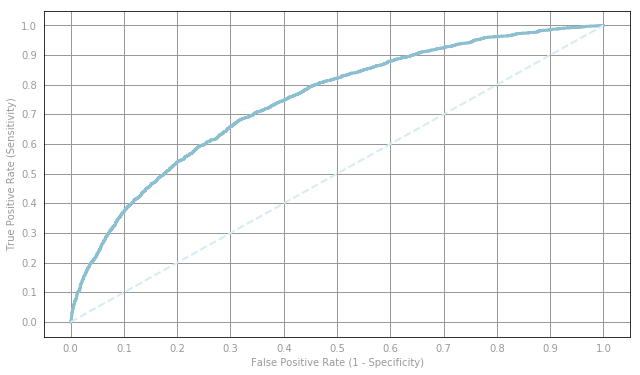

In [127]:
labelsAndScores = OHEValidationData.map(lambda lp:
                                            (lp.label, getP(lp.features, model0.weights, model0.intercept)))
labelsAndWeights = labelsAndScores.collect()
labelsAndWeights.sort(key=lambda kv: kv[1], reverse=True)
labelsByWeight = np.array([k for (k, v) in labelsAndWeights])

length = labelsByWeight.size
truePositives = labelsByWeight.cumsum()
numPositive = truePositives[-1]
falsePositives = np.arange(1.0, length + 1, 1.) - truePositives

truePositiveRate = truePositives / numPositive
falsePositiveRate = falsePositives / (length - numPositive)

# Generate layout and plot data
fig, ax = preparePlot(np.arange(0., 1.1, 0.1), np.arange(0., 1.1, 0.1))
ax.set_xlim(-.05, 1.05), ax.set_ylim(-.05, 1.05)
ax.set_ylabel('True Positive Rate (Sensitivity)')
ax.set_xlabel('False Positive Rate (1 - Specificity)')
plt.plot(falsePositiveRate, truePositiveRate, color='#8cbfd0', linestyle='-', linewidth=3.)
plt.plot((0., 1.), (0., 1.), linestyle='--', color='#d6ebf2', linewidth=2.)  # Baseline model
pass